In [1]:
%matplotlib notebook

datapath = "../data/dl1/objnc/rep/finetune/"
fraction = 0.9
models = ['lambda_1','maxpooling2d_1','maxpooling2d_2','maxpooling2d_3',\
          'maxpooling2d_4','maxpooling2d_5','dense_1','dense_2','dense_3']

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress, spearmanr, pearsonr
import dimest; reload(dimest)
plt.style.use('ggplot')

In [3]:
D = np.load(datapath + 'D_sq.npy')

In [4]:
R = []
for i in range(len(D)):
    R.append(dimest.estimate_dim(D[i], fraction, False))

<IPython.core.display.Javascript object>


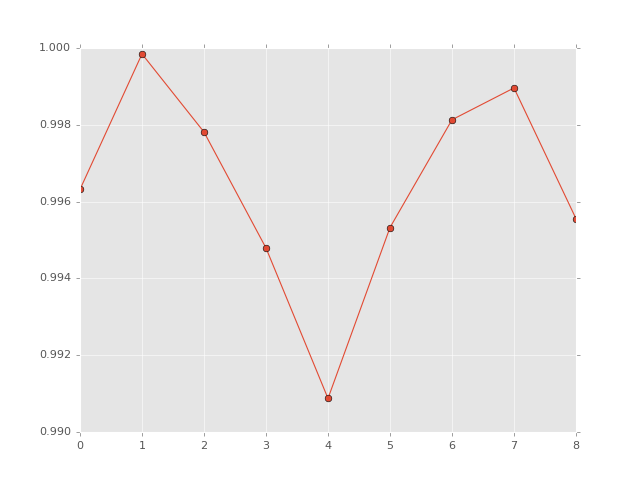

In [5]:
dimest.plot_correlations(R,models)

<IPython.core.display.Javascript object>


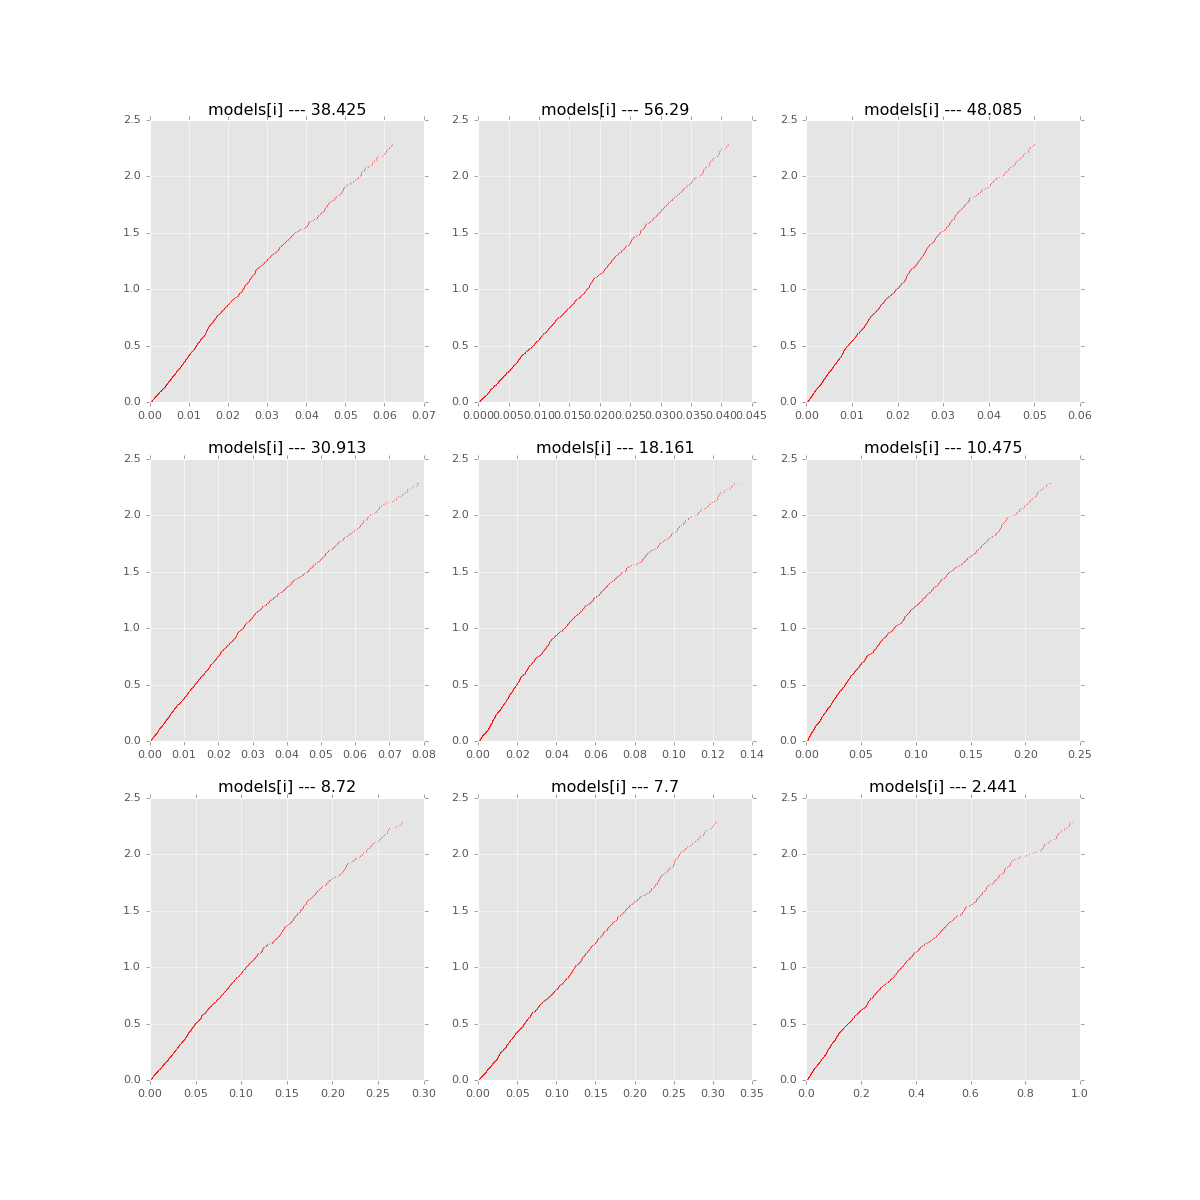

In [6]:
dimest.plot_cumulatives(R,fraction,models)

<IPython.core.display.Javascript object>


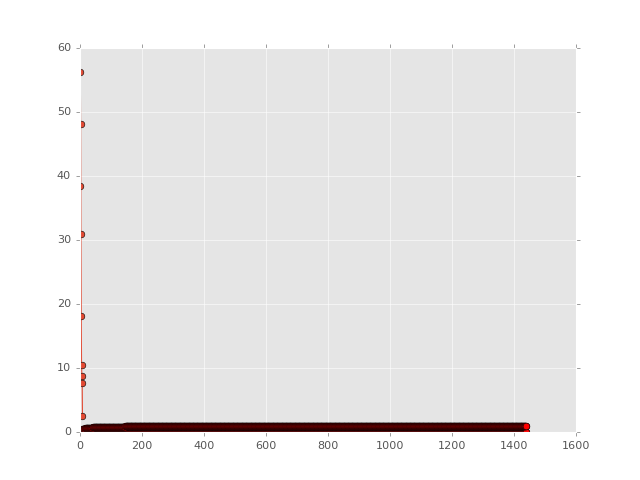

In [7]:
dimest.plot_dimensions(R,models)

In [8]:
from mayavi.mlab import points3d
from sklearn.decomposition import PCA

In [9]:
rep = np.load(datapath + 'dense_1.npy')
rep.shape

(1440L, 4096L)

In [10]:
# pca
pca = PCA()
pca.fit(rep)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
plt.plot(pca.explained_variance_ratio_, '-ro')
plt.show()

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
plt.show()

In [13]:
# pca
pca = PCA(n_components=3)
pca.fit(rep)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
new = pca.transform(rep)
new.shape

(1440L, 3L)

In [15]:
#points3d(new[:,0],new[:,1],new[:,2])

In [16]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


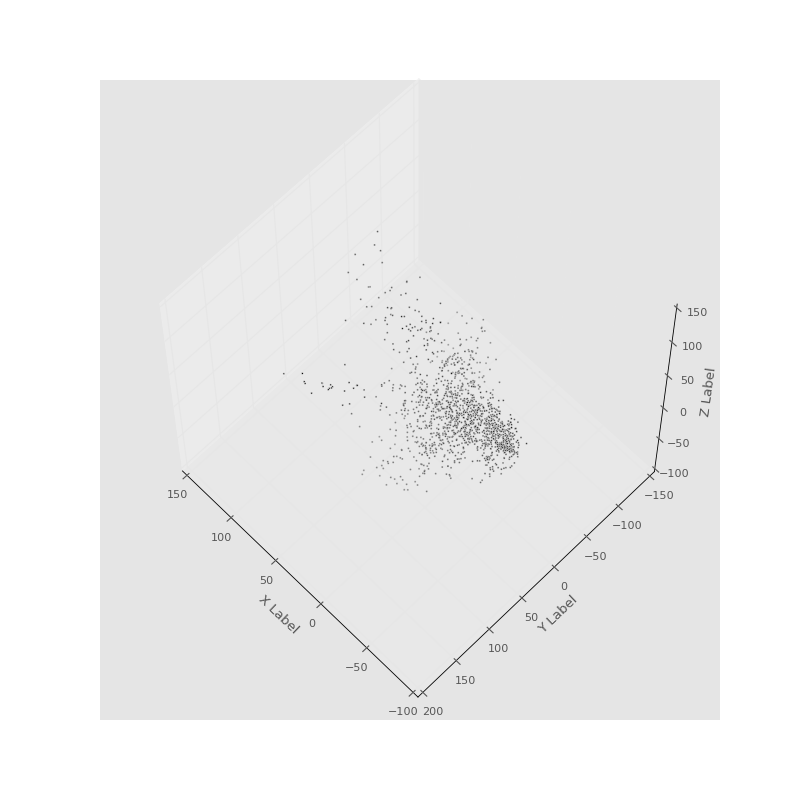

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new[:,0],new[:,1],new[:,2],'.',s=3,c='k')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()